In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
def draw(G, attr):
    pos = nx.spring_layout(G, seed=2)
    
    nodes = G.nodes()
    atter = [nx.get_node_attributes(G, attr)[nod] for nod in nodes]
    color = ['brown' if ele == 1 else 'green' if ele == -1 else 'blue' for ele in atter]
    
    plt.figure(figsize=(10,10))
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color)
    
    plt.axis('off')
    plt.show()

In [13]:
def polarization_idx(G, attr):
    val = [*nx.get_node_attributes(G, attr).values()]
    n_  = sum([ele == -1 for ele in val])/len(val)
    idx = 1 - 4*(n_ - 0.5)**2
    return idx

In [14]:
def step(G, attr):
    nodes  = G.nodes()
    tplus1 = {}
    for each in nodes:
        # zeloth's don't change their mind
        if G.nodes[each]['zealot']:
            continue
        
        var = G.nodes[each]['bias']    
        for neigh in nx.neighbors(G, each):
            var += G.nodes[neigh]['bias']
        tplus1[each] = np.sign(var)

    nx.set_node_attributes(G, tplus1, name='bias')

In [15]:
n, p = 100, 0.05
G = nx.erdos_renyi_graph(n, p, seed=1)

In [16]:
zealot_p = 0

In [17]:
nodes  = G.nodes()

np.random.seed(2);
bias   = np.random.choice((1,-1), size=len(nodes))
zealot = np.random.choice((1, 0), size=len(nodes), p=(zealot_p,(1-zealot_p)))

nx.set_node_attributes(G, {key:value for key, value in zip(nodes, bias)}, name='bias')
nx.set_node_attributes(G, {key:value for key, value in zip(nodes, zealot)}, name='zealot')

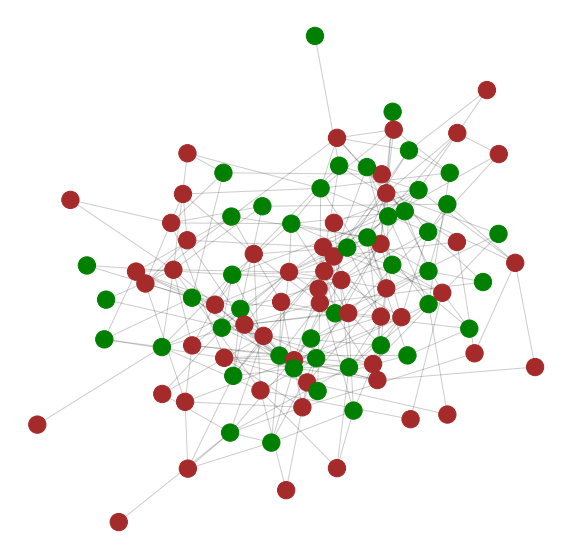

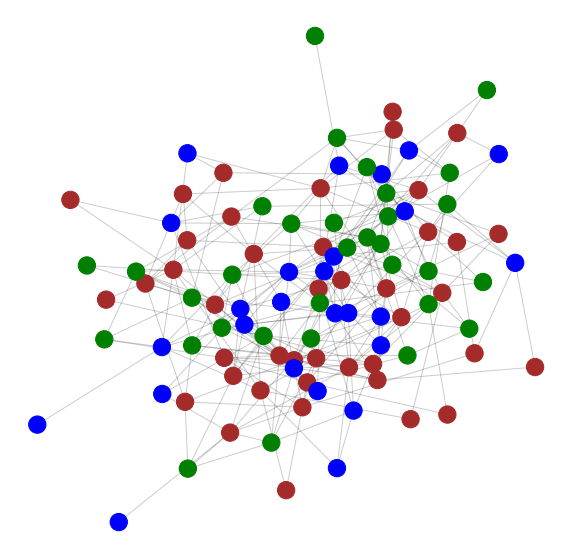

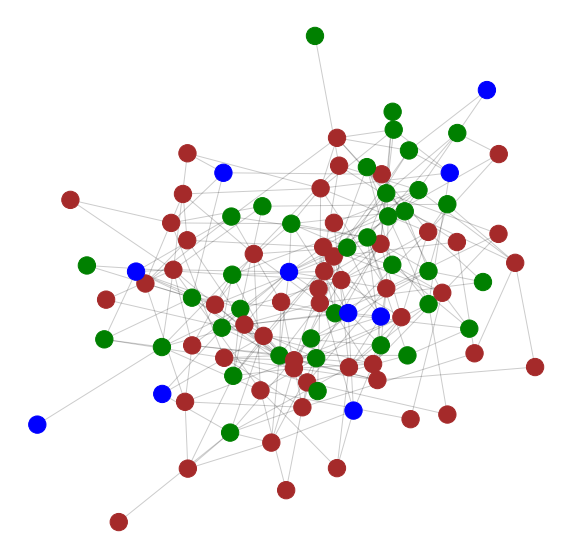

In [18]:
draw(G, 'bias')
step(G, 'bias')
draw(G, 'bias')
step(G, 'bias')
draw(G, 'bias')

In [19]:
change = 0
for each in G.nodes():
    var = G.nodes()[each]['bias']
    for neigh in nx.neighbors(G, each):
        var += G.nodes()[neigh]['bias']
    change += np.sign(var) != G.nodes()[each]['bias']
print("Required Changes", change)

Required Changes 37
